# Indroduction

## Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf

from custom_scripts import CustomScenario

pd.options.display.max_columns = 500

## Input the data

In [2]:
data = pd.read_csv('Final.csv')

In [3]:
data.shape

(8867, 8)

In [4]:
data.isnull().sum()

Unnamed: 0                0
Entity                    0
Code                      0
Year                      0
Cellular Subscription     0
Internet Users(%)         0
No. of Internet Users     0
Broadband Subscription    0
dtype: int64

In [5]:
print(data.Entity.nunique())
print(data.Code.nunique())

229
216


In [6]:
# data.loc[data['Entity'] == 'Low income']
# data.loc[data['Entity'] == 'High income']
# data.Entity.unique()

In [7]:
data.head()

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,4,Afghanistan,AFG,1984,0.0,0.0,0,0.0


# Data prep

In [8]:
# Check unque values
for col in data.columns:
    print(f'{col}:', data[col].nunique())

Unnamed: 0: 8867
Entity: 229
Code: 216
Year: 41
Cellular Subscription: 6344
Internet Users(%): 4702
No. of Internet Users: 5058
Broadband Subscription: 3858


In [9]:
# Duplicates processing
data[data.duplicated()].shape

(0, 8)

In [10]:
data.drop('Unnamed: 0', axis=1, inplace = True)

In [11]:
# Check nulls
data.isnull().sum()

Entity                    0
Code                      0
Year                      0
Cellular Subscription     0
Internet Users(%)         0
No. of Internet Users     0
Broadband Subscription    0
dtype: int64

In [12]:
# Unique values in the "Code" column
data['Code'].unique()

array(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA',
       'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV',
       'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'CRI',
       'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK', 'DJI',
       'DMA', 'DOM', 'Region', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'SWZ', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM',
       'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND',
       'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN',
       'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI',
       'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM',
       'MDA'

In [13]:
df = data.copy()

#Separate World and Region from the dataset and rename 'KOS'
world_df = df[df['Code'].str.contains('OWID_WRL')].copy()
region_df = df[df['Code'].str.contains('Region')].copy()
df['Code'] = df['Code'].replace('OWID_KOS', 'KOS')

# Drop rows with 'OWID_WRL' and 'Region' values
df = df[~df['Code'].isin(['OWID_WRL', 'Region'])].copy()

In [48]:
# Unique values in the "Code" column
df['Code'].nunique()

216

In [15]:
region_df['Entity'].unique()

array(['East Asia and Pacific', 'Europe and Central Asia',
       'European Union', 'High income', 'Latin America and Caribbean',
       'Low and middle income', 'Low income', 'Lower middle income',
       'Middle East and North Africa', 'Middle income', 'North America',
       'South Asia', 'Sub-Saharan Africa', 'Upper middle income'],
      dtype=object)

In [16]:
# Values for separate from the 'Entity' 
selected_values = ['High income', 'Low and middle income', 'Low income', 'Lower middle income', 'Middle income', 'Upper middle income']

# New dataframe for the selected values
income_df = region_df[region_df['Entity'].isin(selected_values)].copy()

# Drop the rows containing the selected values
region_df = region_df[~region_df['Entity'].isin(selected_values)].copy()

In [17]:
# Unique income values 
income_df['Entity'].unique()

array(['High income', 'Low and middle income', 'Low income',
       'Lower middle income', 'Middle income', 'Upper middle income'],
      dtype=object)

In [18]:
# Unique region values
region_df['Entity'].unique()

array(['East Asia and Pacific', 'Europe and Central Asia',
       'European Union', 'Latin America and Caribbean',
       'Middle East and North Africa', 'North America', 'South Asia',
       'Sub-Saharan Africa'], dtype=object)

In [19]:
# Check unique values in similar columns
print(df.Entity.nunique())
print(df.Code.nunique())

214
214


# EDA

## World trend

In [20]:
world_df[:3]

,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
8703,World,OWID_WRL,1980,0.000530,0.0,0,0.0
8704,World,OWID_WRL,1981,0.001487,0.0,0,0.0
8705,World,OWID_WRL,1982,0.002331,0.0,0,0.0


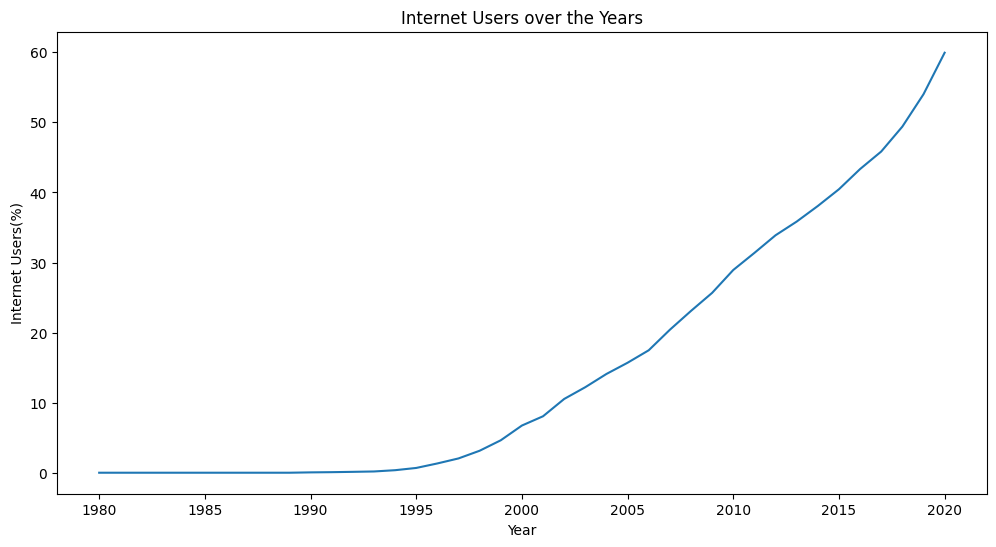

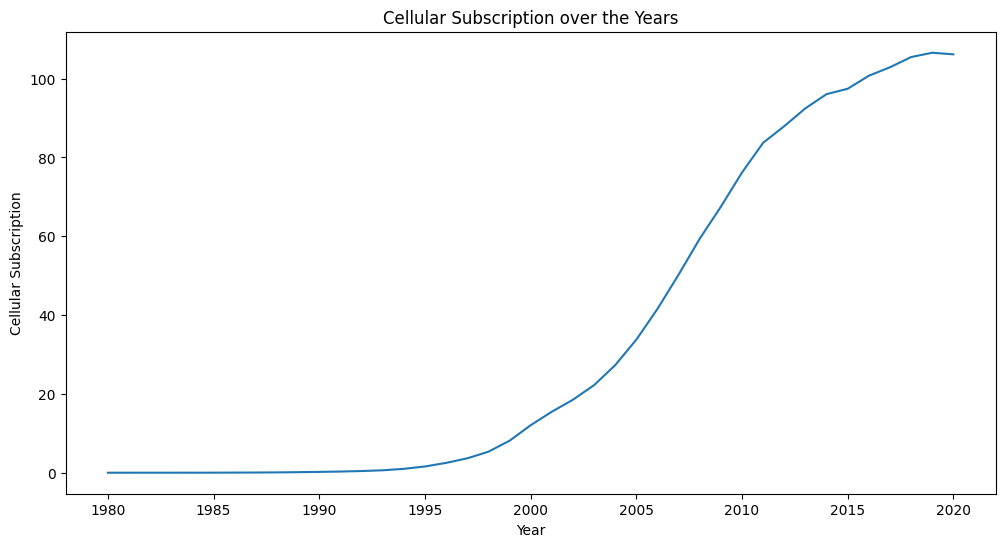

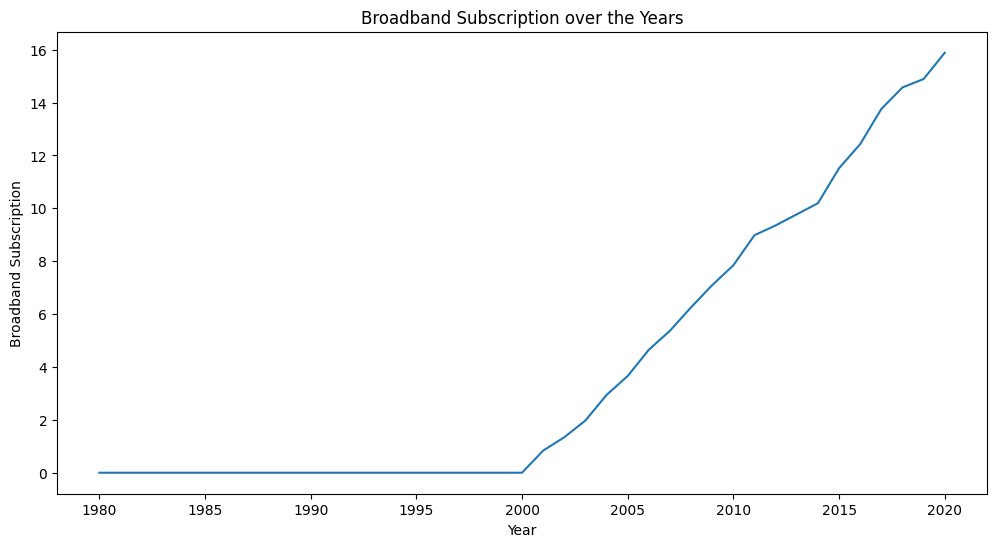

In [21]:
# Line plots of Internet Users, Cellular Subscription and Broadband Subscription over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Internet Users(%)', data=world_df)
plt.title('Internet Users over the Years')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Cellular Subscription', data=world_df)
plt.title('Cellular Subscription over the Years')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Broadband Subscription', data=world_df)
plt.title('Broadband Subscription over the Years')
plt.show()

## Region trend

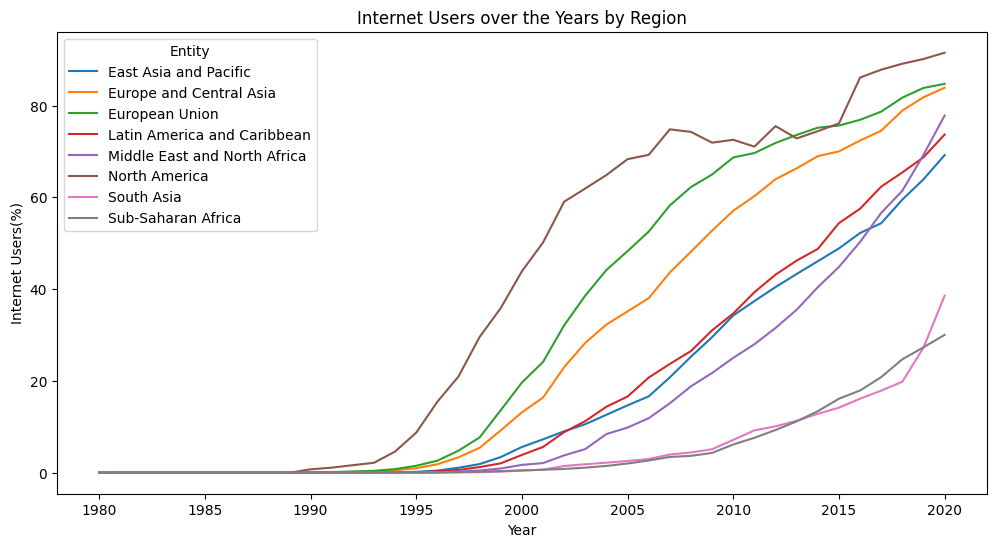

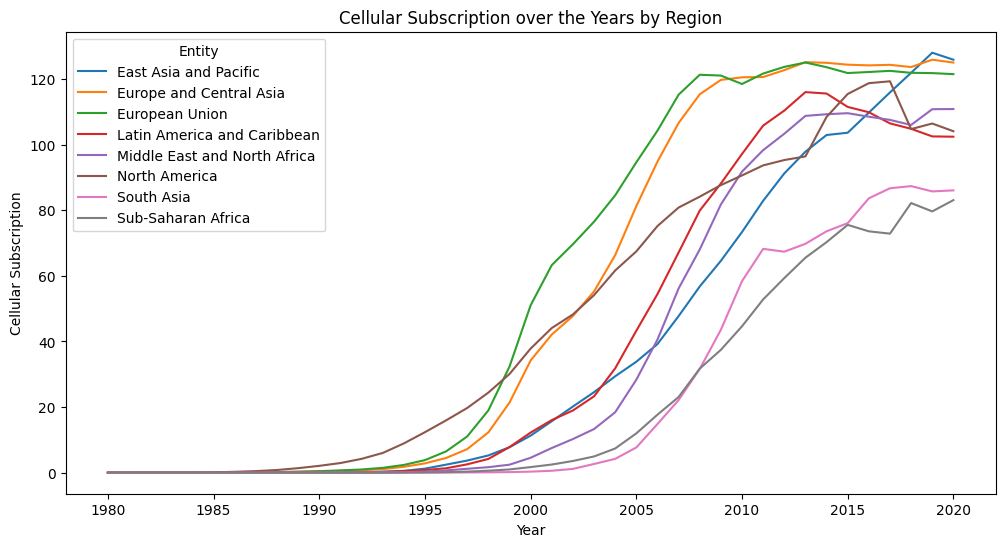

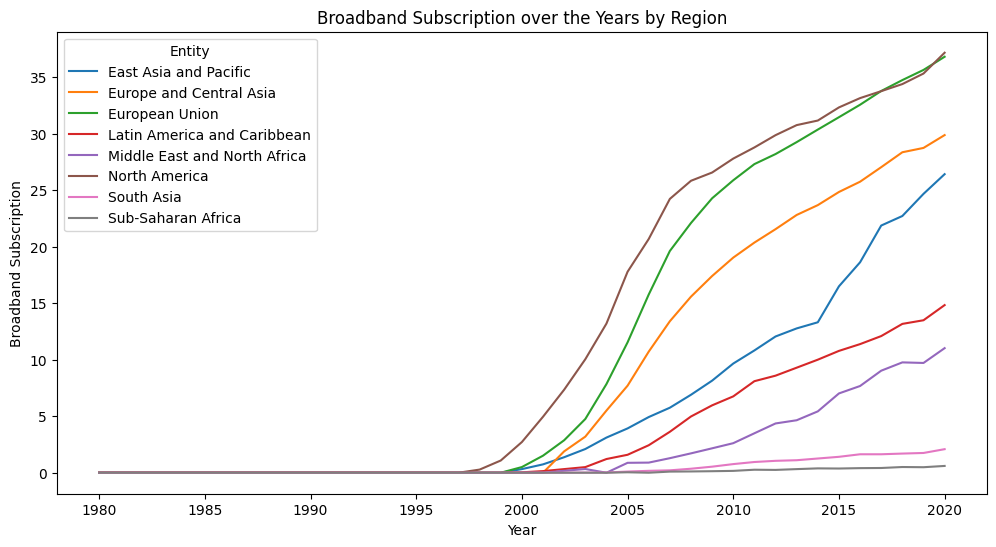

In [22]:
# Line plots of Internet Users, Cellular Subscription and Broadband Subscription over the years for the specific region
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Internet Users(%)', hue='Entity', data=region_df)
plt.title('Internet Users over the Years by Region')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Cellular Subscription', hue='Entity', data=region_df)
plt.title('Cellular Subscription over the Years by Region')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Broadband Subscription', hue='Entity', data=region_df)
plt.title('Broadband Subscription over the Years by Region')
plt.show()

## Income and Internet development

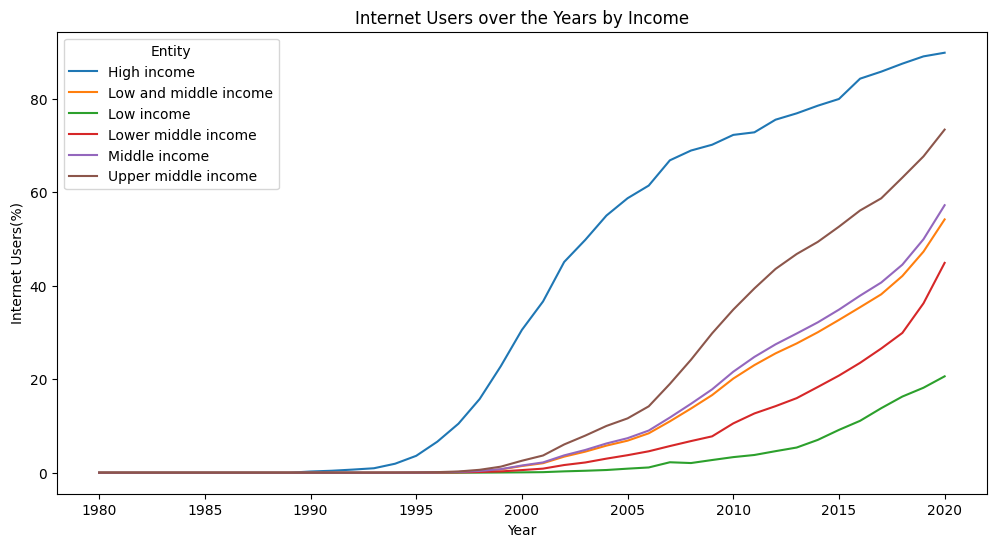

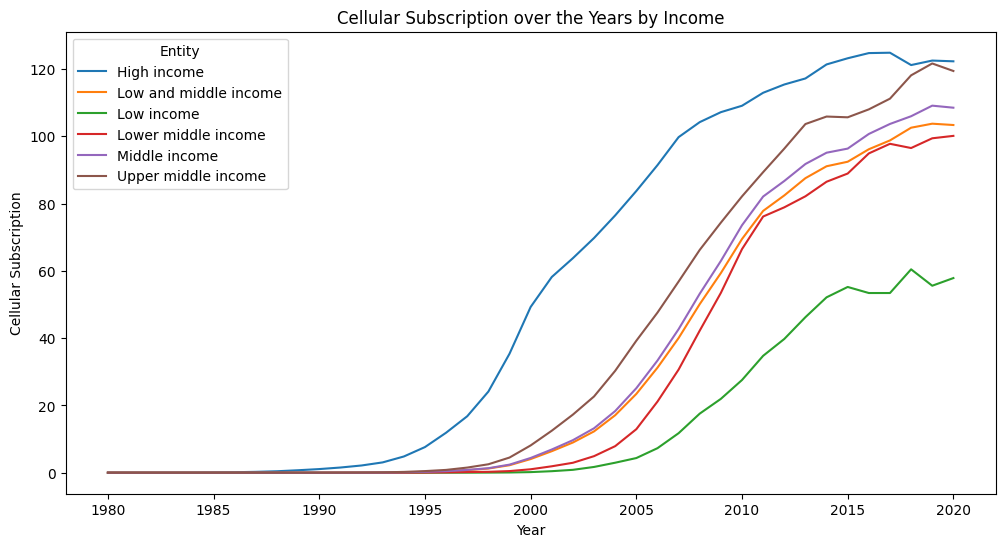

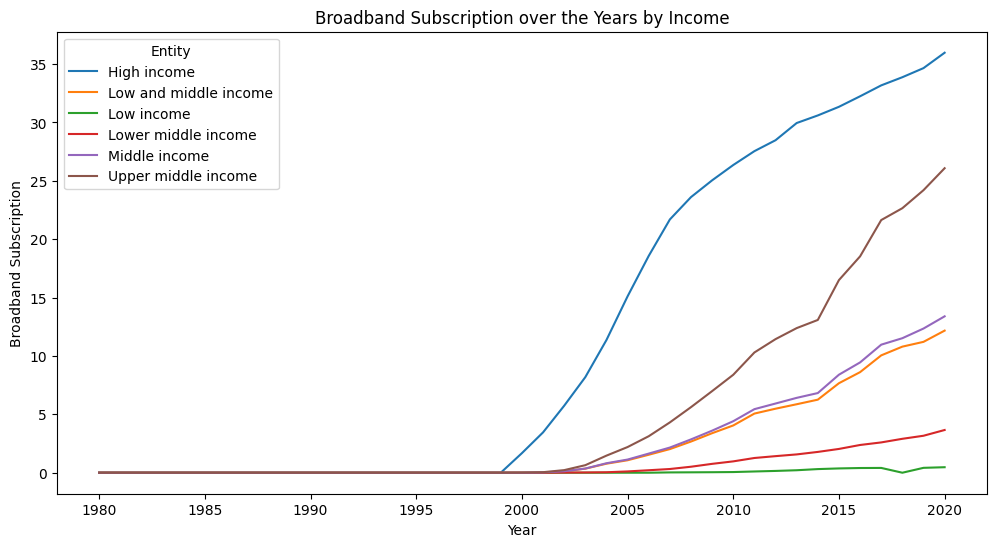

In [23]:
# Line plots of Internet Users, Cellular Subscription and Broadband Subscription over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Internet Users(%)', hue='Entity', data=income_df)
plt.title('Internet Users over the Years by Income')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Cellular Subscription', hue='Entity', data=income_df)
plt.title('Cellular Subscription over the Years by Income')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Broadband Subscription', hue='Entity', data=income_df)
plt.title('Broadband Subscription over the Years by Income')
plt.show()


# Geospatial analysis

In [24]:
# I'll do a study on 2020
# Adjust any other year to your preference
df_2020 = df[df['Year'] == 2020]


In [25]:
fig = px.choropleth(df_2020, 
                    locations='Code', 
                    color='No. of Internet Users', 
                    hover_name='Entity', 
                    color_continuous_scale='RdBu',
                    range_color=(0, 200000000),  # Set the color range from 0 to 200 million
                    )

fig.update_layout(
    title_text='Number of Internet Users in 2020',
    coloraxis_colorbar=dict(
        title='No. of Internet Users',
        dtick=20000000,  # Adjust the colorbar tick interval to your preference
        tickformat='.0s',  # Format the tick labels 
    )
)

fig.show()

In [26]:
fig = px.choropleth(df_2020, locations='Code', 
                    color='Internet Users(%)', 
                    hover_name='Entity', 
                    color_continuous_scale='RdBu')

fig.update_layout(title_text = 'Internet Users (%) in 2020')
fig.show()


In [27]:
fig = px.choropleth(df_2020, 
                    locations='Code', 
                    color='Cellular Subscription', 
                    hover_name='Entity', 
                    color_continuous_scale='RdBu',
                    range_color=(0, 100)  # Set the color range from 0 to 100
                    )

fig.update_layout(
    title_text='Cellular Subscriptions per 100 people in 2020',
    coloraxis_colorbar=dict(
        title='Cellular Subscription',
        dtick=10  # Adjust the colorbar tick interval as per your preference
    )
)

fig.show()


In [28]:
fig = px.choropleth(df_2020, locations='Code', 
                    color='Broadband Subscription', 
                    hover_name='Entity', 
                    color_continuous_scale='RdBu')

fig.update_layout(title_text = 'Fixed Broadband Subscriptions per 100 people in 2020')
fig.show()


# Dimension reduction and clustering

In [29]:
# Create a new column for the decade
df['Decade'] = (df['Year'] // 10) * 10

# Separate the dataframe into different periods
df_80s = df[df['Decade'] == 1980]
df_90s = df[df['Decade'] == 1990]
df_2000s = df[df['Decade'] == 2000]
df_2010s = df[df['Decade'] == 2010]
df_2020s = df[df['Decade'] == 2020]

## PCA, T-SNE, K-Means, DBSCAN (optional)

### Functions

I put it in a separate module in custom_sctipts.py, to ensure notebook readability

In [30]:
cs = CustomScenario()

In [31]:
help(cs.visualize_scenario_func)

Help on method visualize_scenario_func in module custom_scripts:

visualize_scenario_func(df_decade_v1, clustering_method='K-Means', pca_components=2, clusters_num=5, kmeans_init_method=1, dbscan_params=[[0.15, 5]], dbscan_chosen_params=0, show_corr=False) method of custom_scripts.CustomScenario instance
    The main function for executing a scenario of dimensionality reduction and clustering, followed by visualization on graphs.
    
    Parameters
    ----------
    df_decade_v1 : pd.DataFrame
        Initial version of the unscaled dataset. 
    clustering_method : str
        Choice of clustering method: 'K-Means' or 'DBSCAN' (optional). Default is 'K-Means'.
    pca_components : int
        Number of components (2 or 3) for PCA dimensionality reduction. Default is 2.
    clusters_num : int
        Number of clusters for K-Means clustering. Default is 5.
    kmeans_init_method : int
        Choice of initialization method for initial points in K-Means clustering. Default is 1 ('k-m

### Modeling

Below, I'll look at four variations of the scenario on the 2020 data (with defaults for K-Means):
1. scaler -> PCA (3) -> PCA corr corr matrix -> K-Means (5)
2. scaler -> PCA (2) -> K-Means (5)
3. scaler -> PCA (2) -> K-Means (5) -> T-SNE
4. scaler -> PCA (2) -> DBSCAN ([0.15, 5])

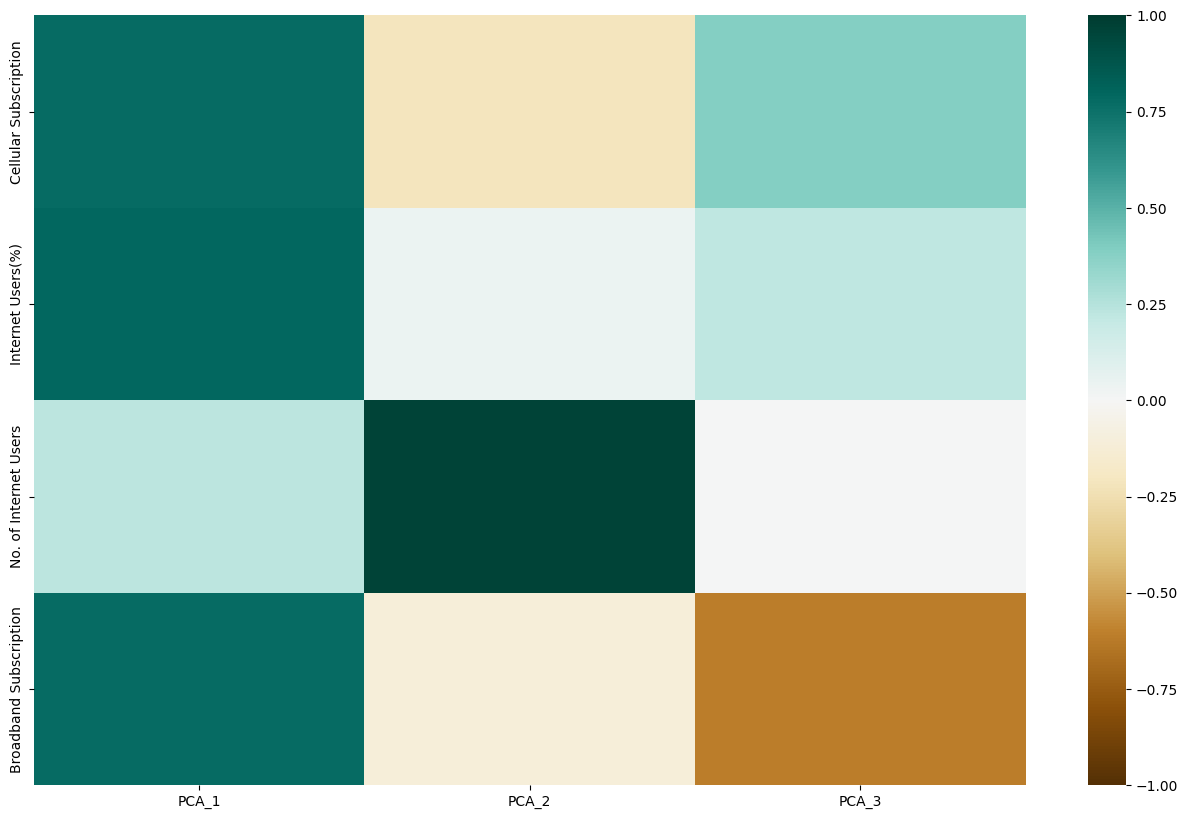

In [32]:
# 1. scaler -> PCA (3) -> PCA corr matrix -> K-Means (5)
cs.visualize_scenario_func(df_2020s, pca_components=3, show_corr=True) 

In [33]:
# 2. scaler -> PCA (2) -> K-Means (5)
cs.visualize_scenario_func(df_2020s, pca_components=2, clusters_num=5) 

In [34]:
# 3. scaler -> PCA (2) -> K-Means (5) -> T-SNE
scaled_data = cs.scale_data_func(df_2020s)
PCA_data = cs.PCA_func(scaled_data)
KMeans_data = cs.KMeans_func(df_2020s, PCA_data, 5)

cs.visualize_TSNE_func(scaled_data, df_2020s, KMeans_data)

In [35]:
# 4. scaler -> PCA (2) -> DBSCAN ([0.15, 5])
cs.visualize_scenario_func(df_2020s, pca_components=2, clustering_method='DBSCAN', dbscan_params = [[0.15, 4]], dbscan_chosen_params = 0)

# Time series analysis

The next stage of my research will be to conduct a time series analysis using the **SARIMAX** model, based on the information about the percentage of Internet usage ('Internet Users(%)') by users worldwide ('OWID_WRL').

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.stattools import adfuller

In [37]:

df = data.copy()

world_df = df[df['Code'].str.contains('OWID_WRL')].copy()

# Remove rows with values from 1980 to 1989 
world_df = world_df[~world_df['Year'].between(1980, 1989)]

world_df.reset_index(drop=True, inplace=True)

# Convert to datetime format
world_df['Year'] = pd.to_datetime(world_df['Year'], format='%Y')
print(world_df.dtypes)

Entity                            object
Code                              object
Year                      datetime64[ns]
Cellular Subscription            float64
Internet Users(%)                float64
No. of Internet Users              int64
Broadband Subscription           float64
dtype: object


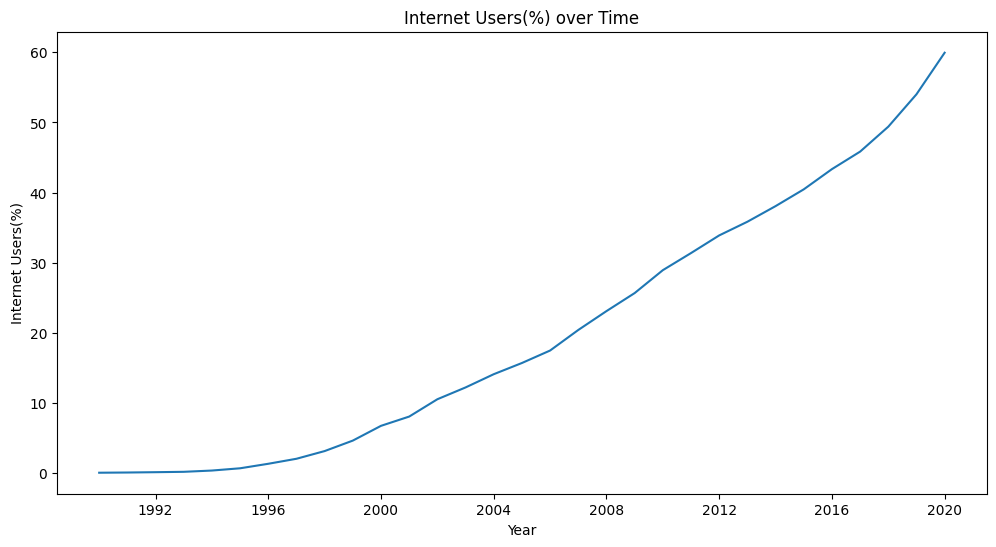

In [38]:
# Plot the time series data
plt.figure(figsize=(12, 6))
sns.lineplot(data=world_df, x='Year', y='Internet Users(%)')
plt.title('Internet Users(%) over Time')
plt.xlabel('Year')
plt.ylabel('Internet Users(%)')
plt.show()

In [39]:
world_df.head()

,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,World,OWID_WRL,1990-01-01,0.210930,0.049235,2617438,0.0
1,World,OWID_WRL,1991-01-01,0.301528,0.079181,4280727,0.0
2,World,OWID_WRL,1992-01-01,0.426715,0.125364,6885825,0.0
3,World,OWID_WRL,1993-01-01,0.617955,0.178900,9978025,0.0
4,World,OWID_WRL,1994-01-01,0.989809,0.359900,20372971,0.0


In [40]:
# Set the Year as the index
world_df.set_index('Year', inplace=True)

# Convert the index to a PeriodIndex with yearly frequency
world_df.index = pd.PeriodIndex(world_df.index, freq='A-DEC')

# Convert the index to datetime format for plotting
world_df.index = world_df.index.to_timestamp()

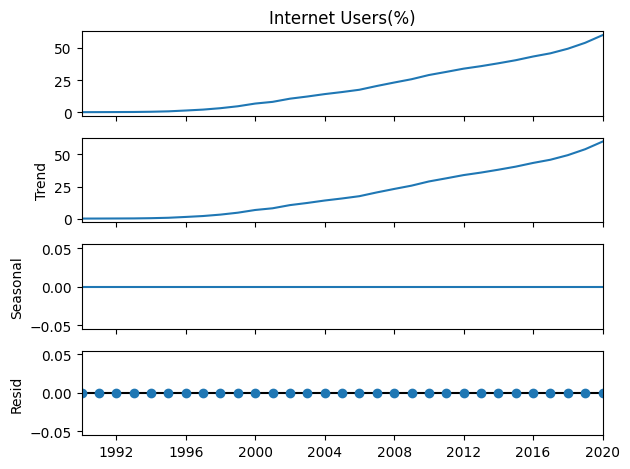

In [41]:
# Decompose the time series
decomposition = seasonal_decompose(world_df['Internet Users(%)'], period=1)

# Plot the trend, seasonal, and residual components
decomposition.plot()
plt.show()

## Modeling

We have used the **SARIMAX** (p, d, q)(P, D, Q, m), where:
- p, d, q are the non-seasonal parameters,
- P, D, Q are the seasonal parameters, and
- m is the number of periods per season.


Highlight the following two stages of the study:

1. **ARIMA**. In our case, since seasonality is absent, seasonal parameters were not used.
2. **SARIMA**. Since the data only contains yearly information, we do not have the ability to study the seasonal components of the model (P, D, Q, m). As part of the approach investigation, I **synthetically transformed the data** by interpolating it monthly, adding weak seasonality based on a sinusoidal law, and slightly adding noise to the time series.

### 1. ARIMA

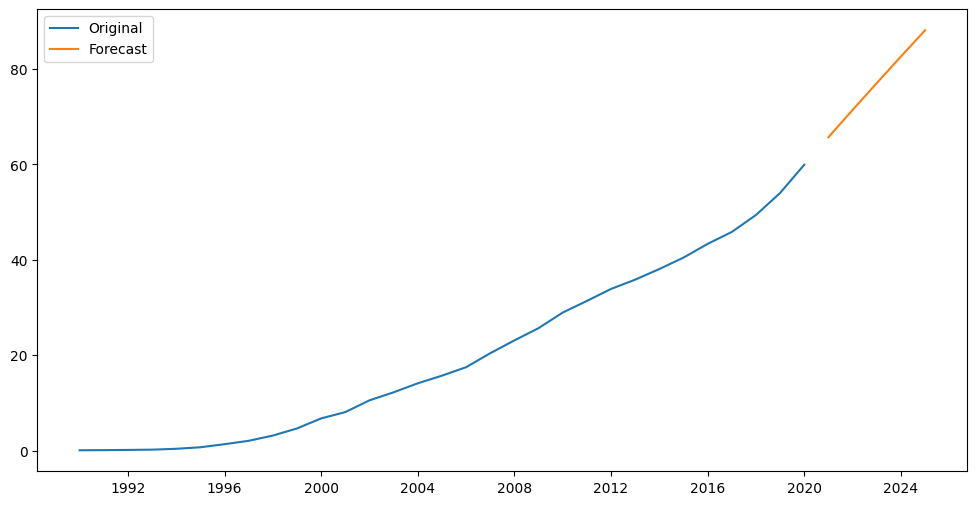

In [42]:
# Fit a ARIMA model
model = SARIMAX(world_df['Internet Users(%)'], order=(1, 1, 1))
results = model.fit(disp=-1)

# Generate forecast for the next 5 years
future_years = [world_df.index[-1] + DateOffset(years=x) for x in range(1, 6)]
future_years_df = pd.DataFrame(index=future_years, columns=world_df.columns)
future_df = pd.concat([world_df, future_years_df])

# Predict for the next 5 years
future_df['forecast'] = results.predict(start = len(world_df), end = len(world_df) + 5, dynamic= True)

# Plot the original data, the fitted values, and the forecast
plt.figure(figsize=(12, 6))
plt.plot(future_df['Internet Users(%)'], label='Original')
plt.plot(future_df['forecast'], label='Forecast')
plt.legend(loc='best')
plt.show()

The level of Internet penetration in the world has had a steady upward trend for many years. The forecast assumes that this trend will continue in the future. However, it should be noted that the forecast is based solely on past trends and does not take into account any potential socio-economic, technological or political factors that could significantly affect future Internet usage rates.

### 2. SARIMA

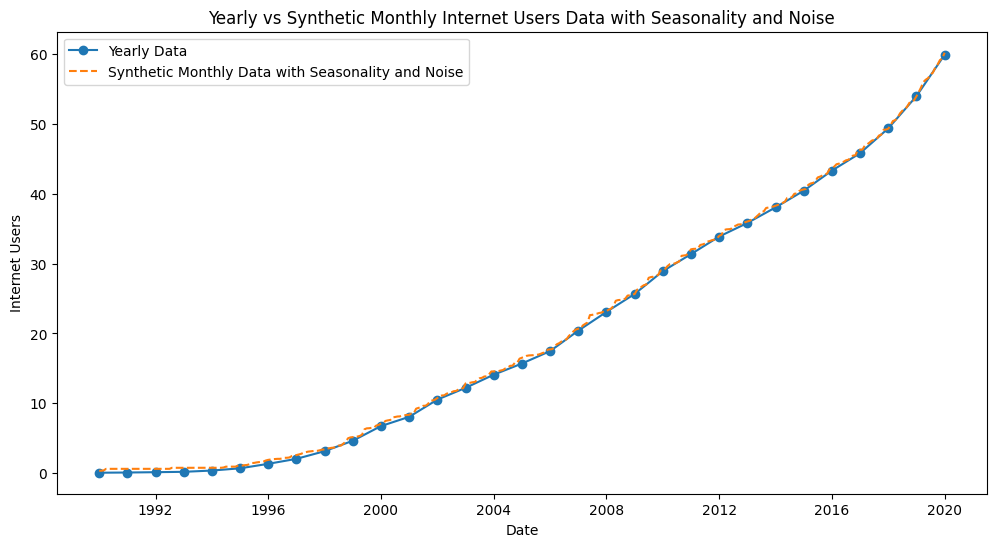

In [43]:
# Convert yearly dataset to monthly
monthly_index = pd.date_range(start='1990-01-01', end='2020-01-01', freq='MS')

monthly_df = world_df.reindex(monthly_index)
monthly_df = monthly_df.interpolate(method='linear')


# Adding seasonal components and noise
np.random.seed(42)
trend = monthly_df['Internet Users(%)']
seasonality = 0.02 * np.sin(2 * np.pi * monthly_df.index.month / 12)
noise = np.random.normal(0.15, 0.25, size=len(monthly_df))

values = trend + seasonality + noise

values = np.array(values)


# Ensuring that values do not decrease, where the growth trend has increased
for i in range(1, len(values)):
    if values[i] < values[i - 1]:

        if i > 60:
            values[i] = values[i - 1]+ np.abs(np.random.normal(-0.05, 0.05))
        else:
            values[i] = values[i - 1]

monthly_df['Internet Users(%)'] = values
# monthly_df

plt.figure(figsize=(12, 6))
plt.plot(world_df.index, world_df['Internet Users(%)'], label='Yearly Data', marker='o')
plt.plot(monthly_df.index, monthly_df['Internet Users(%)'], label='Synthetic Monthly Data with Seasonality and Noise', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Internet Users')
plt.legend()
plt.title('Yearly vs Synthetic Monthly Internet Users Data with Seasonality and Noise')
plt.show()

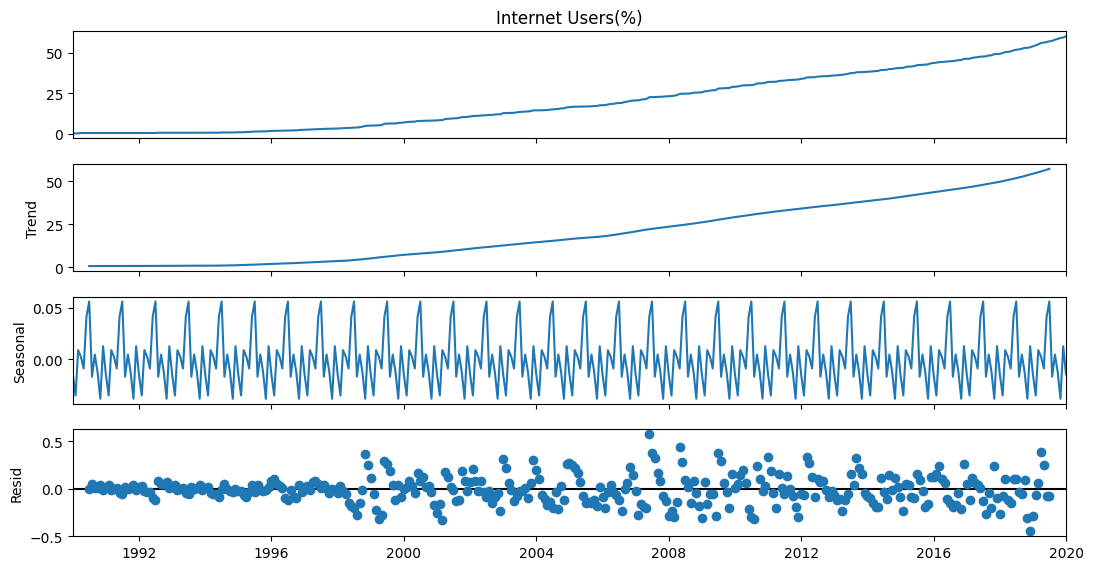

In [44]:
# Decompose the time series
decomposition = seasonal_decompose(monthly_df['Internet Users(%)'], period=12)

# Plot the trend, seasonal, and residual components
fig = decomposition.plot()
fig.set_size_inches(12, 6) 
plt.show()

In [45]:
# Conducting the Dickey-Fuller test
result = adfuller(monthly_df['Internet Users(%)'].dropna())

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretation of the result
if result[1] < 0.05:
    print("Series is stationary")
else:
    print("Series is not stationary")


ADF Statistic: 3.4350189489926155
p-value: 1.0
Critical Values: {'1%': -3.44911857009962, '5%': -2.8698097654570507, '10%': -2.5711757061225153}
Series is not stationary


MSE: 9.777009298611059
MAE: 2.285211569311146
RMSE: 3.1268209572361285
MAPE: 4.24%


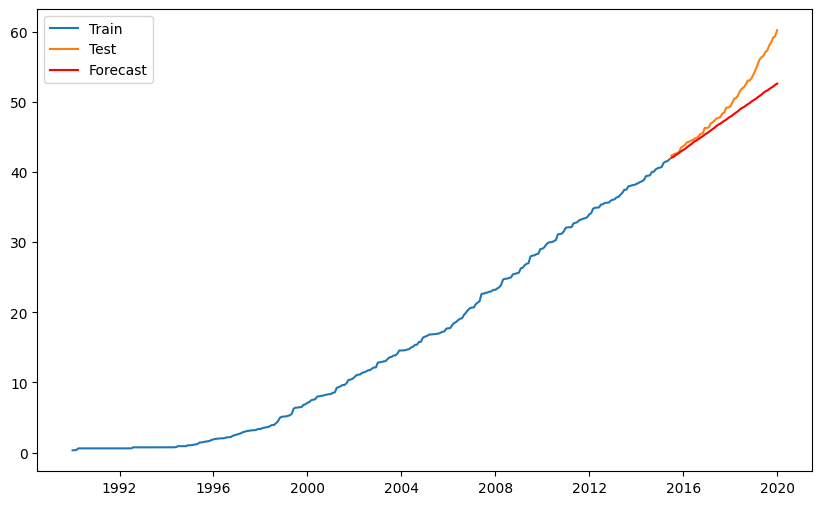

In [46]:
# Splitting data into training and test sets
train_size = int(len(monthly_df) * 0.85)
train, test = monthly_df[:train_size], monthly_df[train_size:]

# Model parameters
p, d, q = 1, 1, 1
P, D, Q, m = 1, 1, 1, 12

# SARIMA model
sarima_model = SARIMAX(train['Internet Users(%)'], order=(p, d, q), seasonal_order=(P, D, Q, m))
sarima_result = sarima_model.fit(disp=False)

# Forecasting on the test dataset
forecast_steps = len(test)
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_df = pd.DataFrame(forecast.predicted_mean, index=test.index).rename(columns = {'predicted_mean' : 'forecast'})

# Model validation
mse = mean_squared_error(test['Internet Users(%)'], forecast_df['forecast'])
mae = mean_absolute_error(test['Internet Users(%)'], forecast_df['forecast'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['Internet Users(%)'] - forecast_df['forecast']) / test['Internet Users(%)'])) * 100

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Internet Users(%)'], label='Train')
plt.plot(test.index, test['Internet Users(%)'], label='Test')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast', color='red')
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

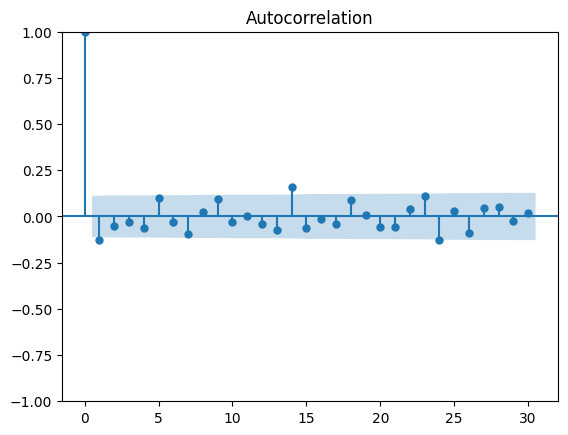

In [47]:
# Plotting the Autocorrelation Function (ACF) of the SARIMA model residuals
residuals = sarima_result.resid
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=30)
plt.show()

## Results

The SARIMA model demonstrated a good ability to forecast the time series, taking into account the trend and weak seasonality.
The low MAPE value (4.24%) indicates high model accuracy.  
  
  
In autocorrelation plot, most ACF values lie within the blue area, indicating no significant autocorrelation in the residuals.  
This is a good sign, suggesting that the SARIMA model has adequately captured the time series.